# Machine Learning Project on Disease Predictions using Symptoms

# Problem Statement


Now-a-days, people face various diseases due to the environmental condition and their living habits. So the prediction of disease at earlier stage becomes important task. But the accurate prediction on the basis of symptoms becomes too difficult for doctor. The correct prediction of disease is the most challenging task. To overcome this problem data mining plays an important role to predict the disease. 
With the help of disease data, data mining finds hidden pattern information in the huge amount of medical data. I proposed general disease prediction based on symptoms of the patient.

In [123]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
sns.set_theme()
%matplotlib inline

# Data Collection
I used Disease Prediction dataset by KAUSHIL268 in Kaggle is used. The Excel csv file that was extracted as at 27 Jan 2022 for the purpose of this task is available at https://www.kaggle.com/kaushil268/disease-prediction-using-machine-learning.

# Reading the dataset

In [125]:
# import data from Excel csv sheet
dftrain = pd.read_csv(r'project\Training.csv')
dftest = pd.read_csv(r'project\Testing.csv')

# show first 5 records of training dataset
dftrain.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


# Data Preprocessing

In [126]:
# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [127]:
dftrain.describe() 

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


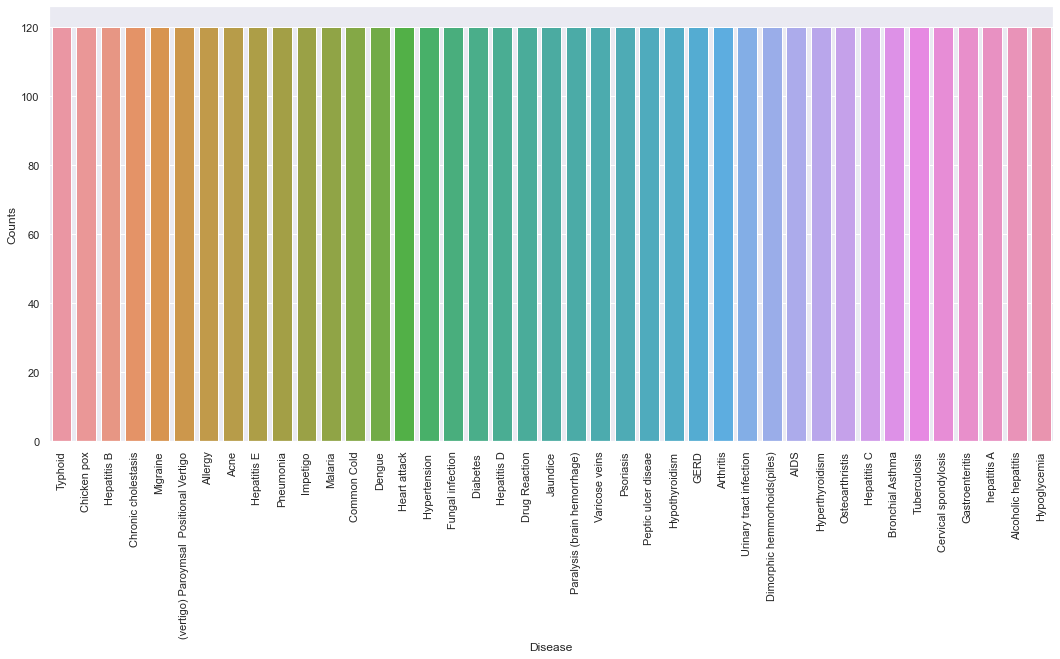

In [128]:
# Checking whether the dataset is balanced or not
disease_counts = dftrain["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

From the above plot, we can observe that the dataset is a balanced dataset i.e. there are exactly 120 samples for each disease, and no further balancing is required. 
I will be using a label encoder to convert the prognosis column to the numerical datatype. Label Encoder converts the labels into numerical form by assigning a unique index to the labels. If the total number of labels is n, then the numbers assigned to each label will be between 0 to n-1.

In [129]:
# Encoding the target value into numerical
# value using LabelEncoder
#encoder = LabelEncoder()
#dftrain["prognosis"] = encoder.fit_transform(dftrain["prognosis"])


In [130]:
# drop 'Unnamed: 133'
dftrain.drop('Unnamed: 133', axis=1, inplace=True)

In [131]:
# identify null values
null_columns=dftest.columns[dftest.isnull().any()]
dftest[null_columns].isnull().sum()

Series([], dtype: float64)

Through this, it is found that there are no null values present in the test dataset.

Next, errors of inconsistent data such as not comparable numerical measurement formats and data types are checked by analysing the bar plots.

<ipython-input-132-8e3de6d41d2d>:5: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



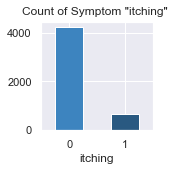

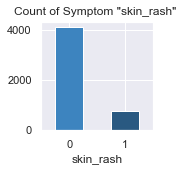

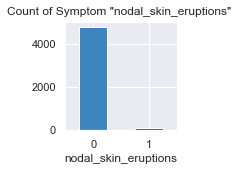

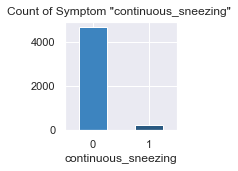

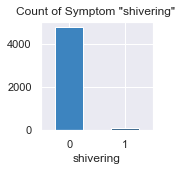

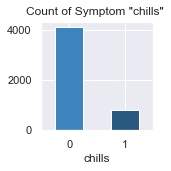

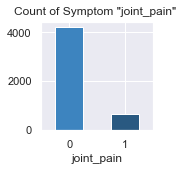

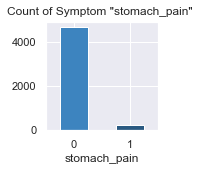

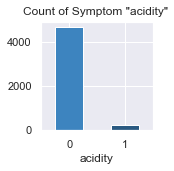

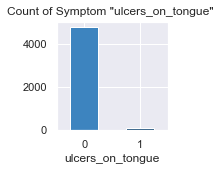

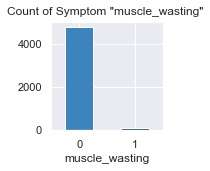

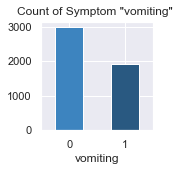

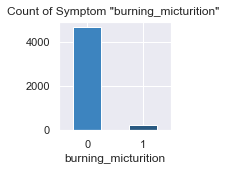

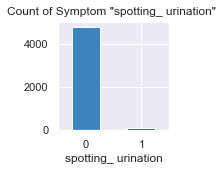

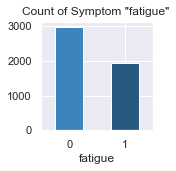

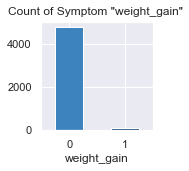

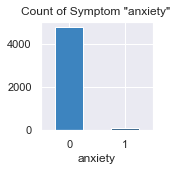

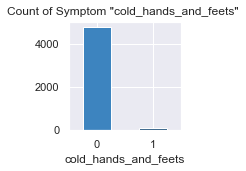

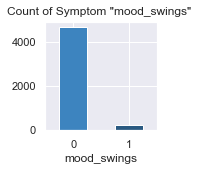

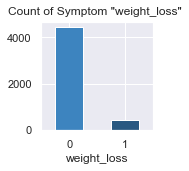

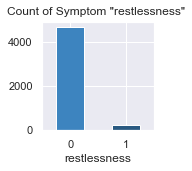

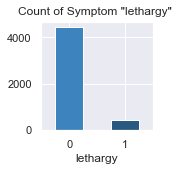

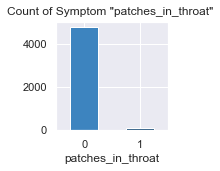

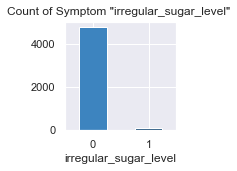

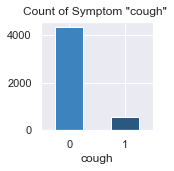

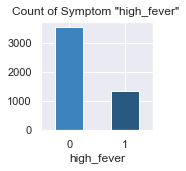

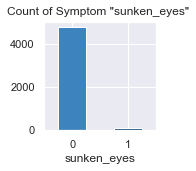

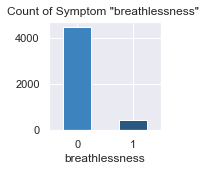

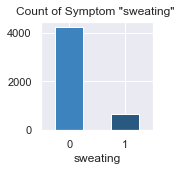

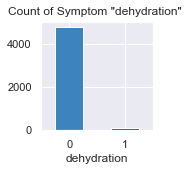

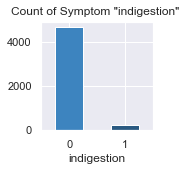

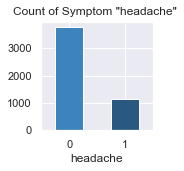

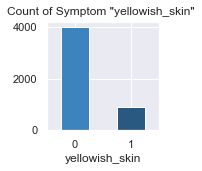

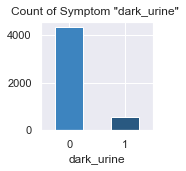

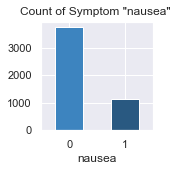

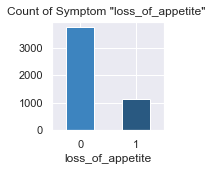

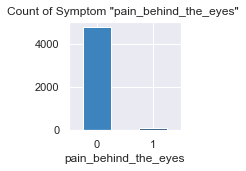

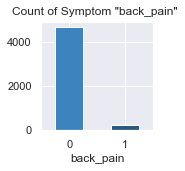

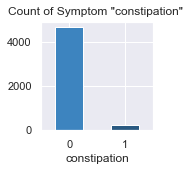

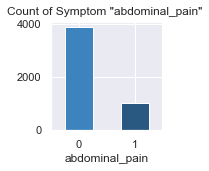

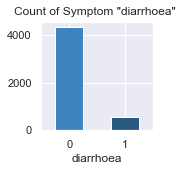

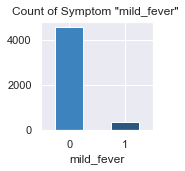

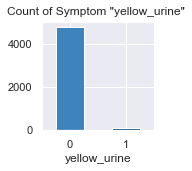

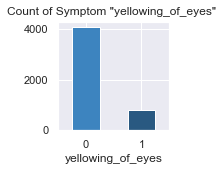

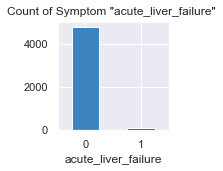

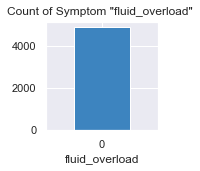

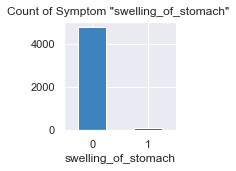

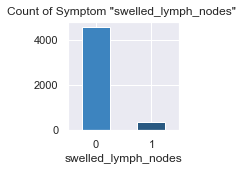

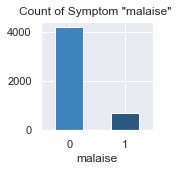

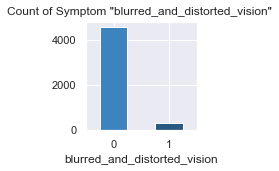

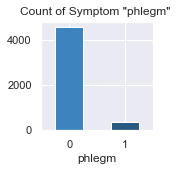

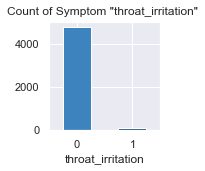

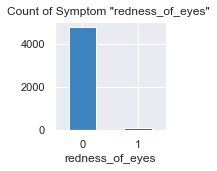

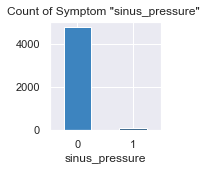

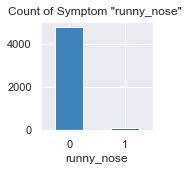

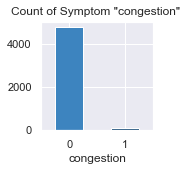

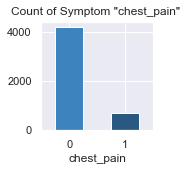

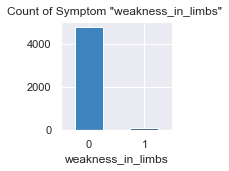

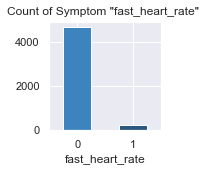

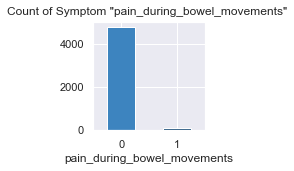

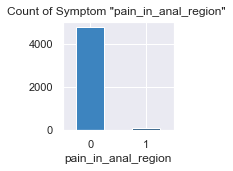

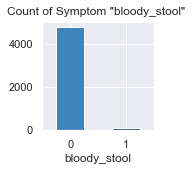

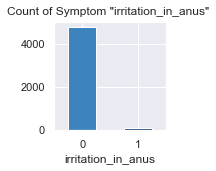

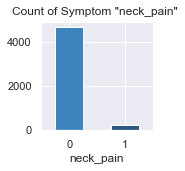

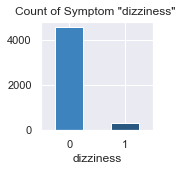

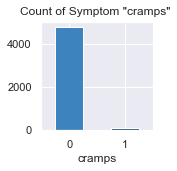

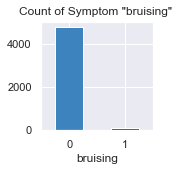

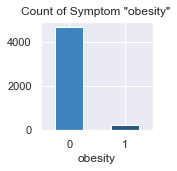

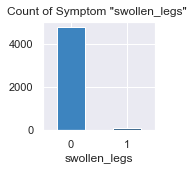

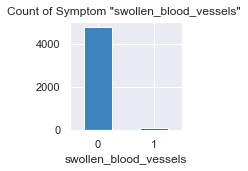

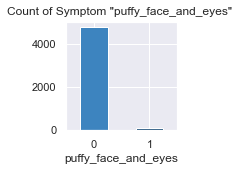

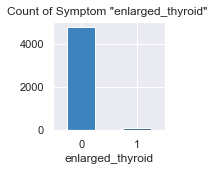

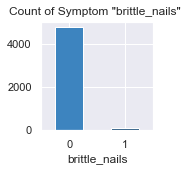

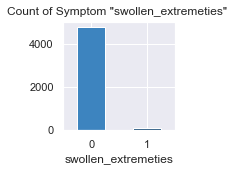

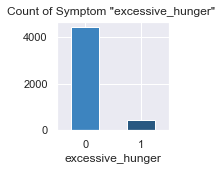

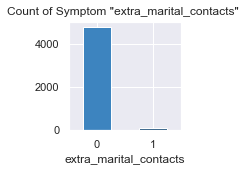

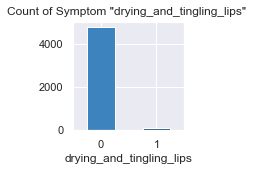

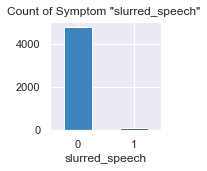

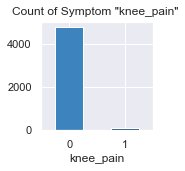

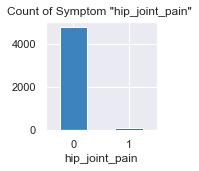

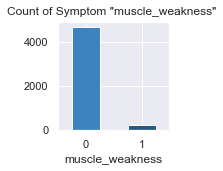

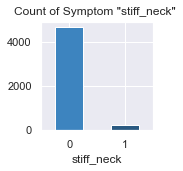

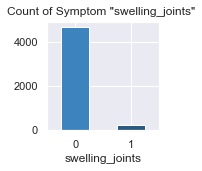

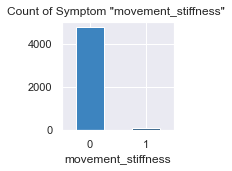

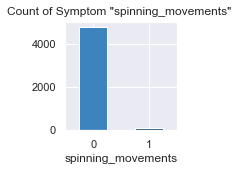

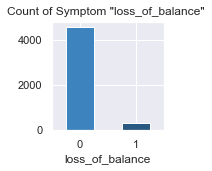

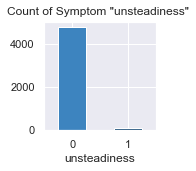

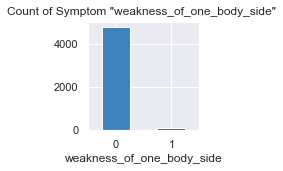

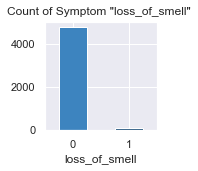

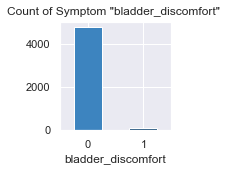

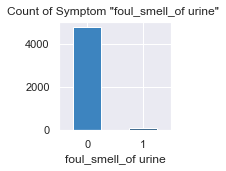

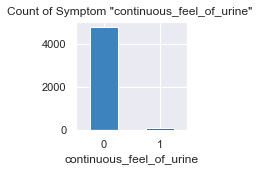

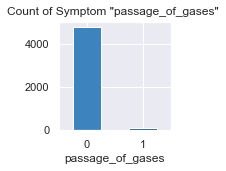

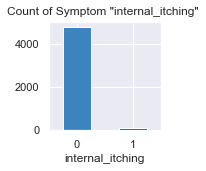

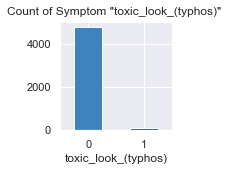

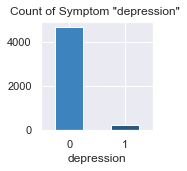

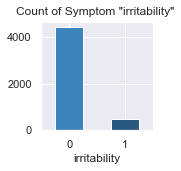

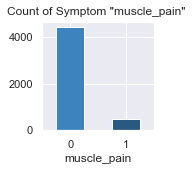

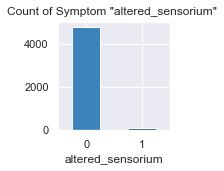

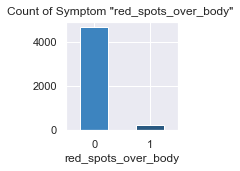

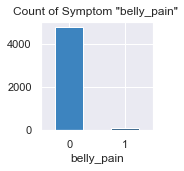

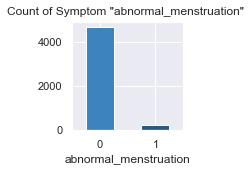

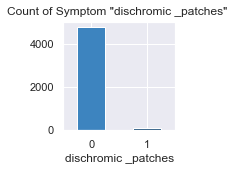

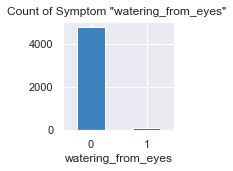

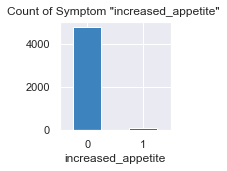

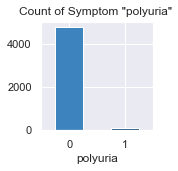

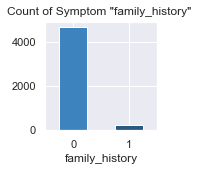

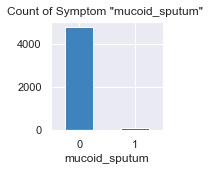

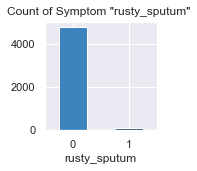

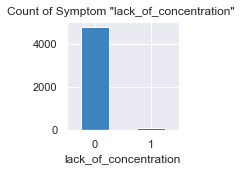

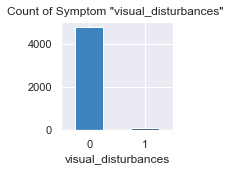

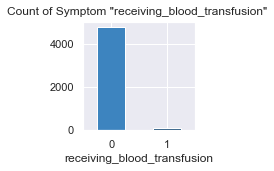

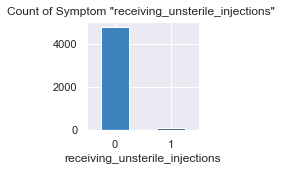

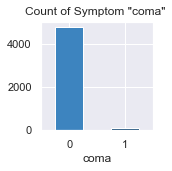

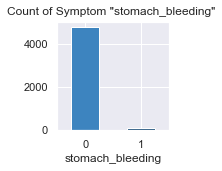

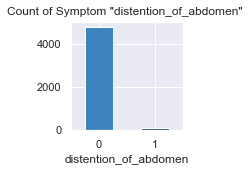

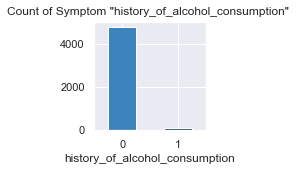

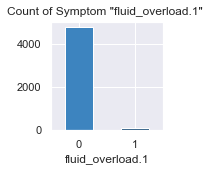

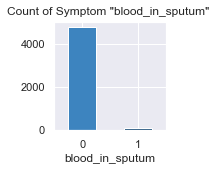

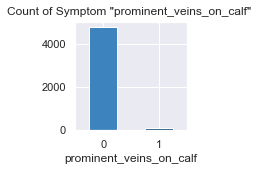

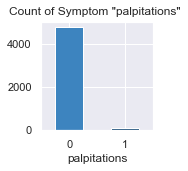

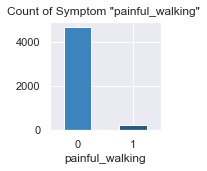

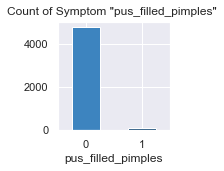

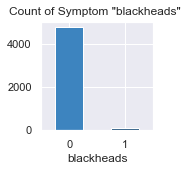

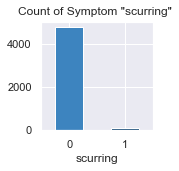

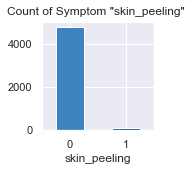

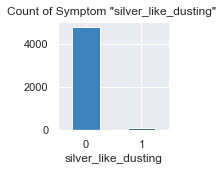

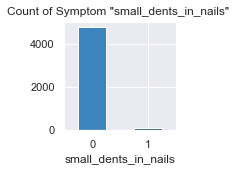

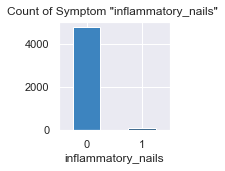

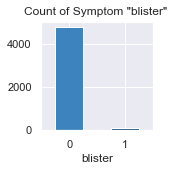

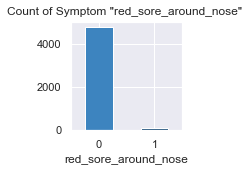

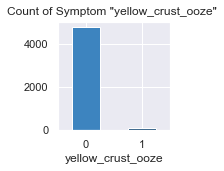

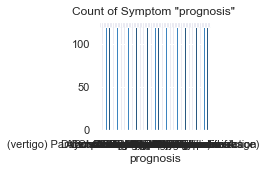

In [132]:
colors = ['#3d84bf', '#295981']
columns = list(dftrain.columns)
# barplot of the count for all symptoms' absence and presence
for i in columns :
    fig, ax = plt.subplots(figsize=(2,2))
    bar = dftrain.groupby(i).size().plot(kind='bar', color=colors, ax=ax)
    plt.xticks(rotation=0)
    fig.suptitle("Count of Symptom \"" + i + "\"")

Through this, it is found that there are no noises of impossible values or errors of inconsistent values. All predictors have boolean values.

For the next step, unique() is used to check qualitative data for noises of impossible values such as incorrect mispelt data entries.

In [133]:
# all symptoms, sorted alphabetically
sorted(dftrain.prognosis.unique())

['(vertigo) Paroymsal  Positional Vertigo',
 'AIDS',
 'Acne',
 'Alcoholic hepatitis',
 'Allergy',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chicken pox',
 'Chronic cholestasis',
 'Common Cold',
 'Dengue',
 'Diabetes ',
 'Dimorphic hemmorhoids(piles)',
 'Drug Reaction',
 'Fungal infection',
 'GERD',
 'Gastroenteritis',
 'Heart attack',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hypertension ',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Hypothyroidism',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Osteoarthristis',
 'Paralysis (brain hemorrhage)',
 'Peptic ulcer diseae',
 'Pneumonia',
 'Psoriasis',
 'Tuberculosis',
 'Typhoid',
 'Urinary tract infection',
 'Varicose veins',
 'hepatitis A']

Through this, it is found that there are no noises of impossible values or errors of inconsistent values.


In [134]:
# detect duplicated records
dftest[dftest.duplicated(subset = None, keep = False)]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis


There are no duplications in the test dataset.


In [135]:
# list and count the target class label names and their frequency
from collections import Counter
count = Counter(dftrain['prognosis'])
count.items()

dict_items([('Fungal infection', 120), ('Allergy', 120), ('GERD', 120), ('Chronic cholestasis', 120), ('Drug Reaction', 120), ('Peptic ulcer diseae', 120), ('AIDS', 120), ('Diabetes ', 120), ('Gastroenteritis', 120), ('Bronchial Asthma', 120), ('Hypertension ', 120), ('Migraine', 120), ('Cervical spondylosis', 120), ('Paralysis (brain hemorrhage)', 120), ('Jaundice', 120), ('Malaria', 120), ('Chicken pox', 120), ('Dengue', 120), ('Typhoid', 120), ('hepatitis A', 120), ('Hepatitis B', 120), ('Hepatitis C', 120), ('Hepatitis D', 120), ('Hepatitis E', 120), ('Alcoholic hepatitis', 120), ('Tuberculosis', 120), ('Common Cold', 120), ('Pneumonia', 120), ('Dimorphic hemmorhoids(piles)', 120), ('Heart attack', 120), ('Varicose veins', 120), ('Hypothyroidism', 120), ('Hyperthyroidism', 120), ('Hypoglycemia', 120), ('Osteoarthristis', 120), ('Arthritis', 120), ('(vertigo) Paroymsal  Positional Vertigo', 120), ('Acne', 120), ('Urinary tract infection', 120), ('Psoriasis', 120), ('Impetigo', 120)]

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



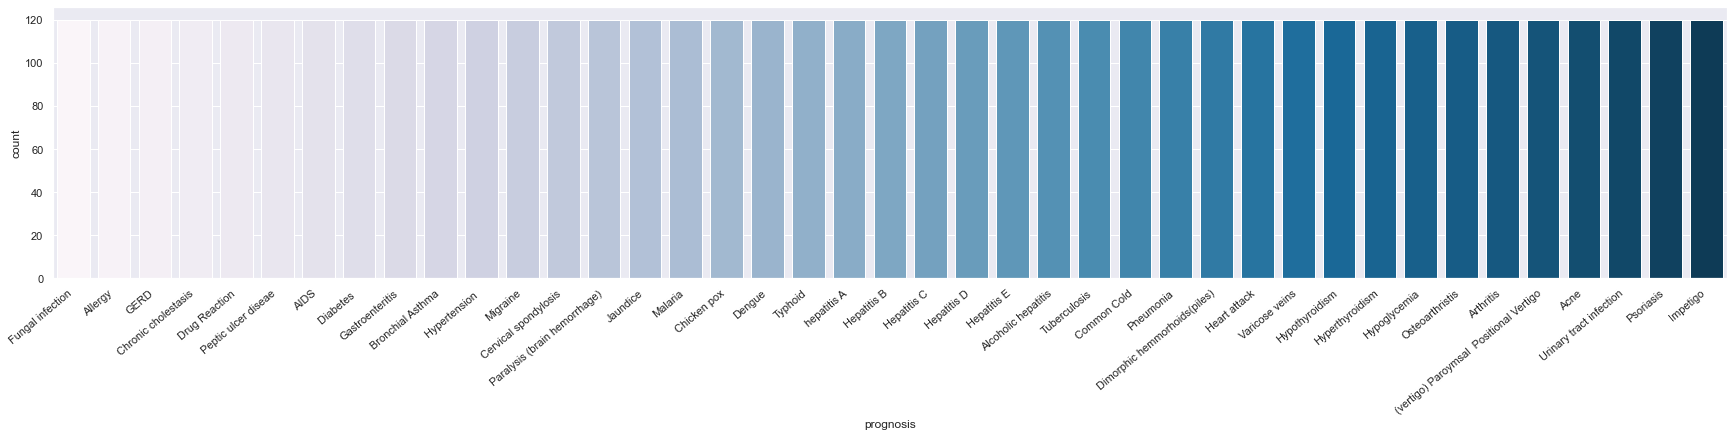

In [136]:
import seaborn as sns
# count of each target class label
plt.figure(figsize = (30, 5))
ax = sns.countplot(dftrain['prognosis'], palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

In [137]:
# list and count the target class label names and their frequency
count = Counter(dftest['prognosis'])
count.items()

dict_items([('Fungal infection', 2), ('Allergy', 1), ('GERD', 1), ('Chronic cholestasis', 1), ('Drug Reaction', 1), ('Peptic ulcer diseae', 1), ('AIDS', 1), ('Diabetes ', 1), ('Gastroenteritis', 1), ('Bronchial Asthma', 1), ('Hypertension ', 1), ('Migraine', 1), ('Cervical spondylosis', 1), ('Paralysis (brain hemorrhage)', 1), ('Jaundice', 1), ('Malaria', 1), ('Chicken pox', 1), ('Dengue', 1), ('Typhoid', 1), ('hepatitis A', 1), ('Hepatitis B', 1), ('Hepatitis C', 1), ('Hepatitis D', 1), ('Hepatitis E', 1), ('Alcoholic hepatitis', 1), ('Tuberculosis', 1), ('Common Cold', 1), ('Pneumonia', 1), ('Dimorphic hemmorhoids(piles)', 1), ('Heart attack', 1), ('Varicose veins', 1), ('Hypothyroidism', 1), ('Hyperthyroidism', 1), ('Hypoglycemia', 1), ('Osteoarthristis', 1), ('Arthritis', 1), ('(vertigo) Paroymsal  Positional Vertigo', 1), ('Acne', 1), ('Urinary tract infection', 1), ('Psoriasis', 1), ('Impetigo', 1)])

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



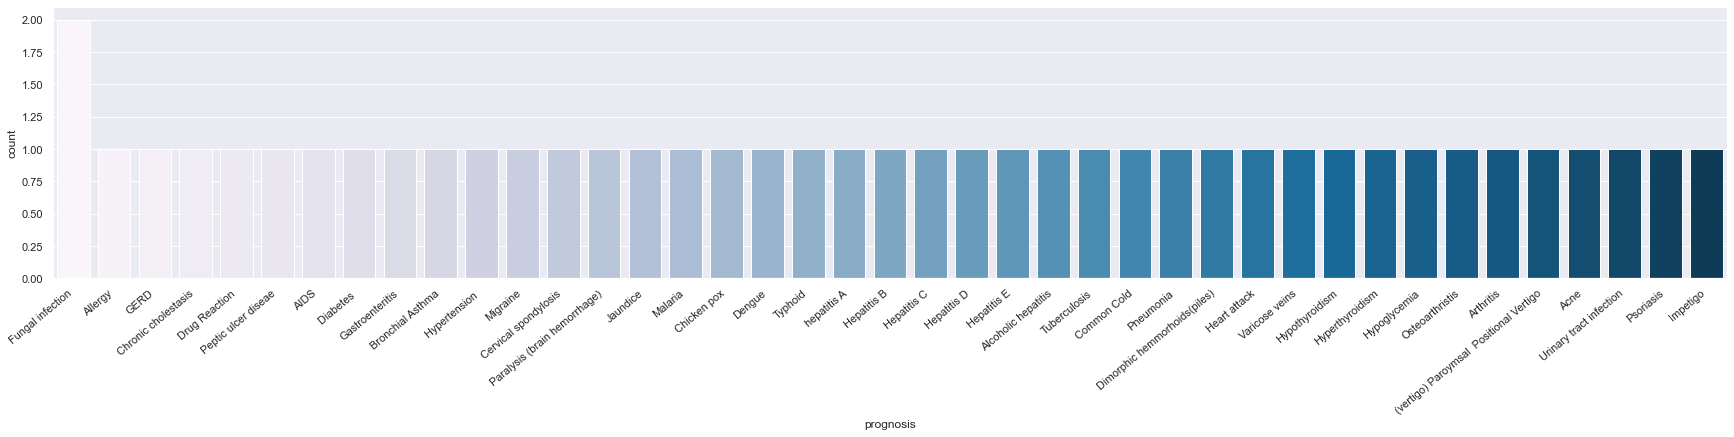

In [138]:
# count of each target class label
plt.figure(figsize = (30, 5))
ax = sns.countplot(dftest['prognosis'], palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

This clearly illustrates that data available for most target labels are proportionate, which will be taken note of for further data visualisations and analysis later on.

In [139]:
# list of all symptoms
columns = list(dftrain.columns)
columns

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


Next, a closer look at the individual diagnosis of each symptom will identify the frequency of occurence of its absence or presence.

<ipython-input-140-ebe22f1723e5>:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



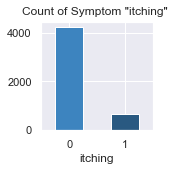

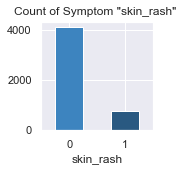

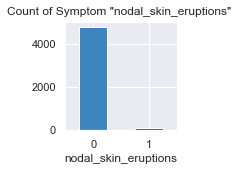

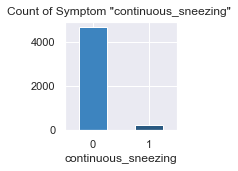

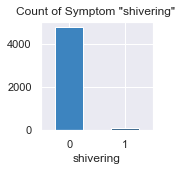

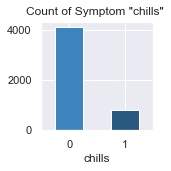

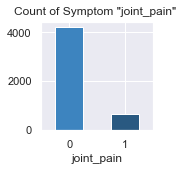

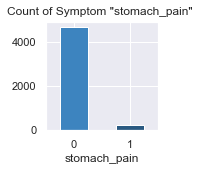

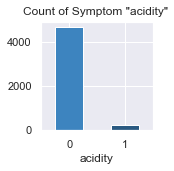

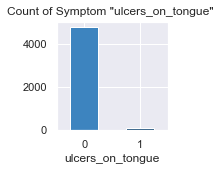

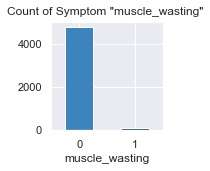

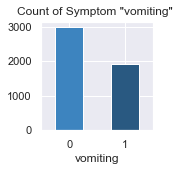

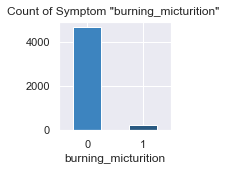

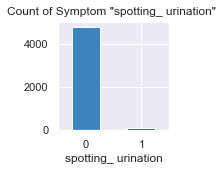

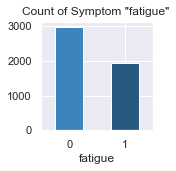

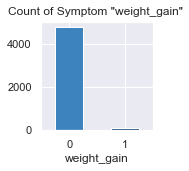

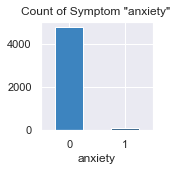

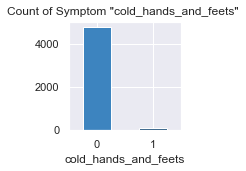

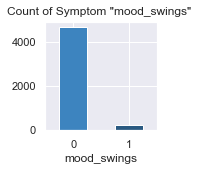

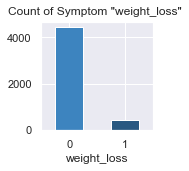

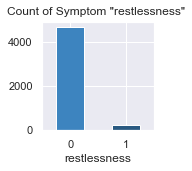

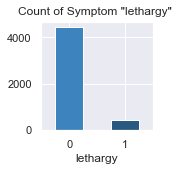

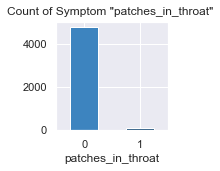

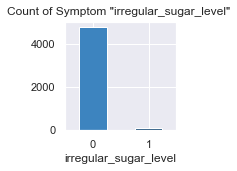

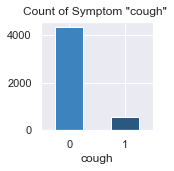

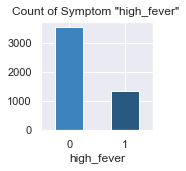

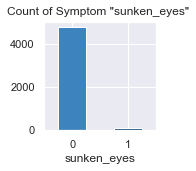

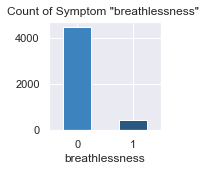

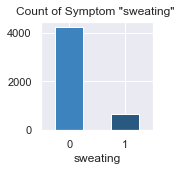

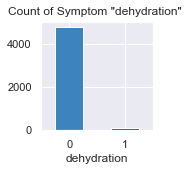

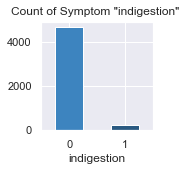

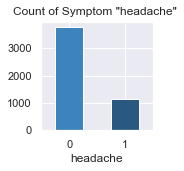

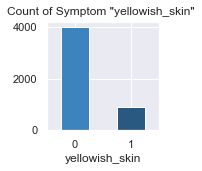

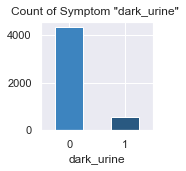

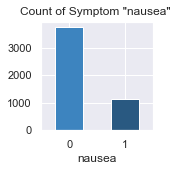

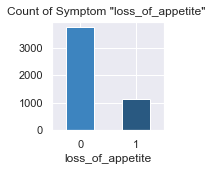

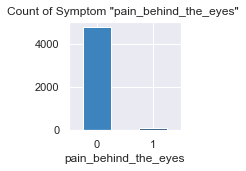

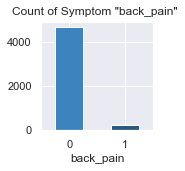

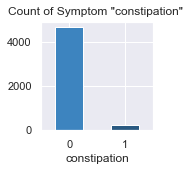

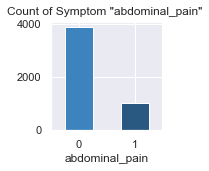

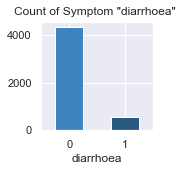

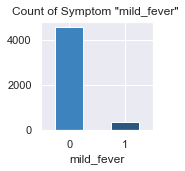

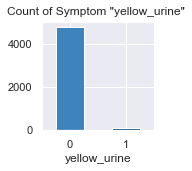

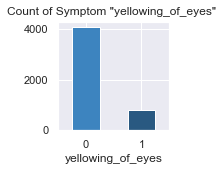

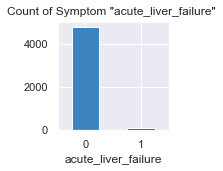

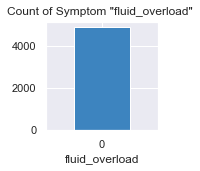

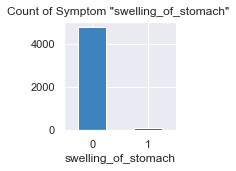

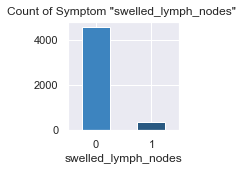

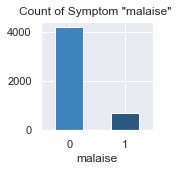

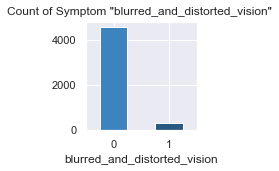

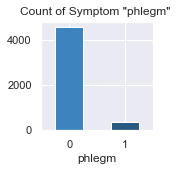

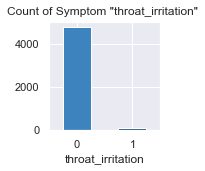

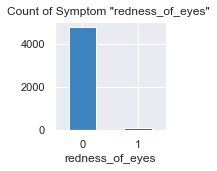

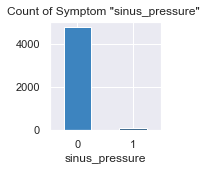

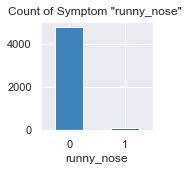

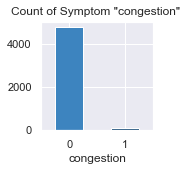

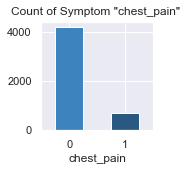

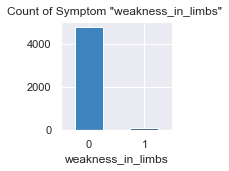

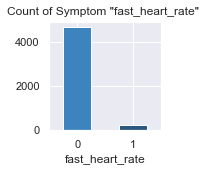

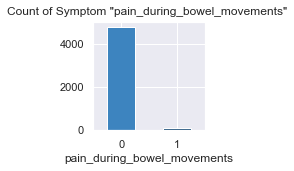

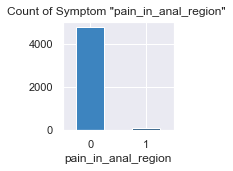

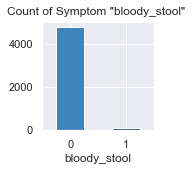

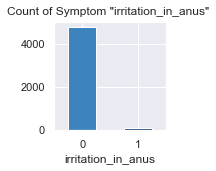

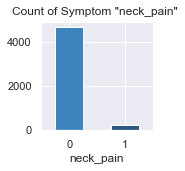

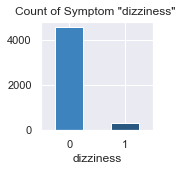

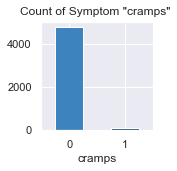

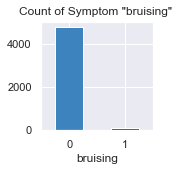

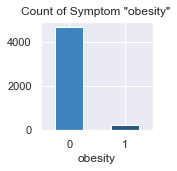

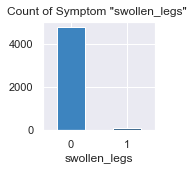

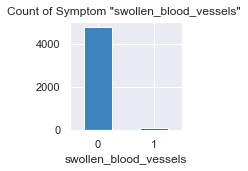

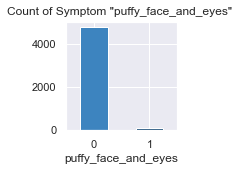

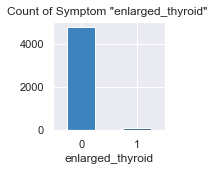

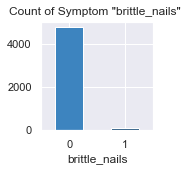

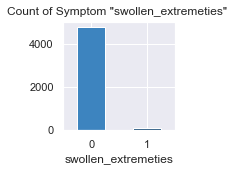

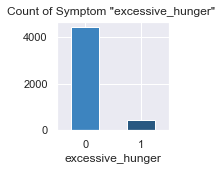

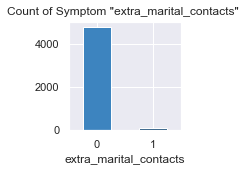

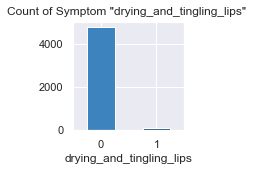

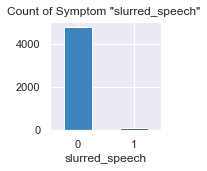

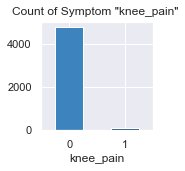

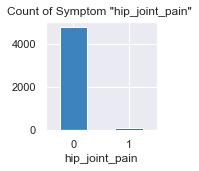

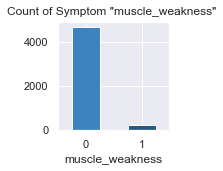

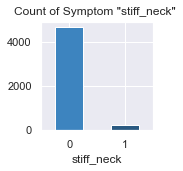

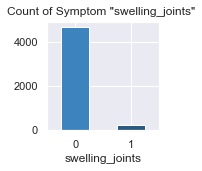

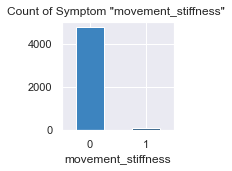

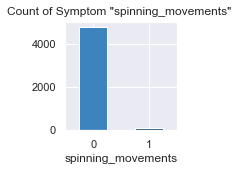

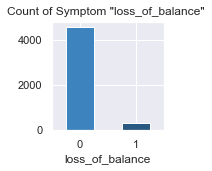

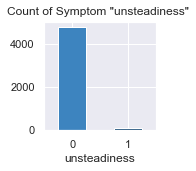

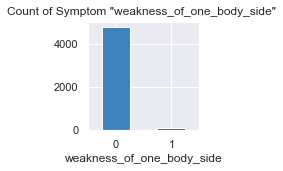

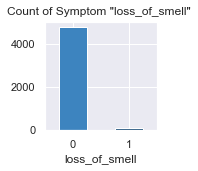

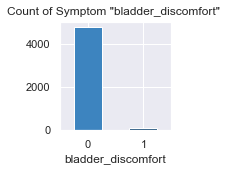

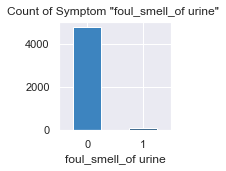

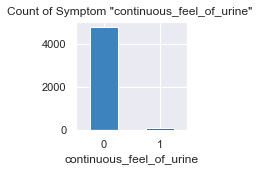

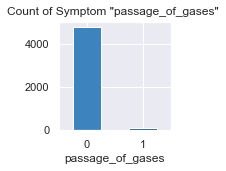

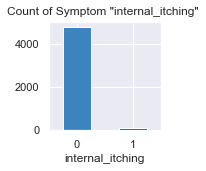

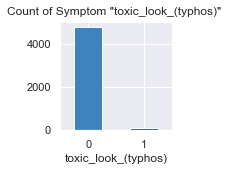

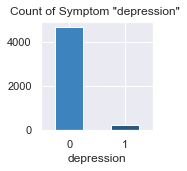

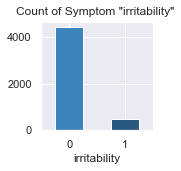

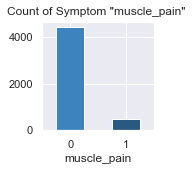

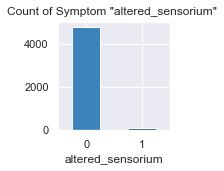

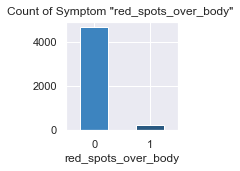

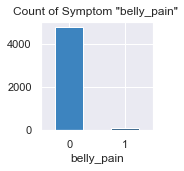

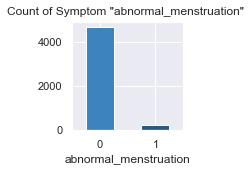

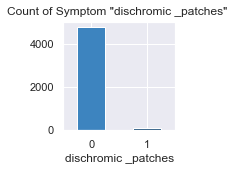

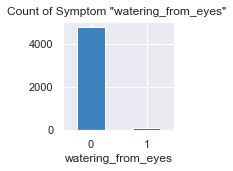

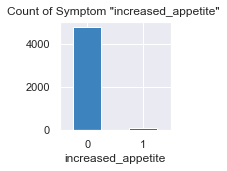

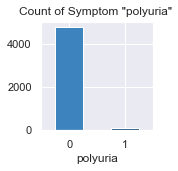

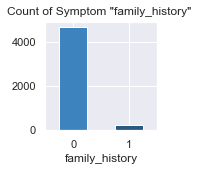

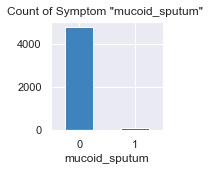

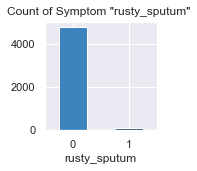

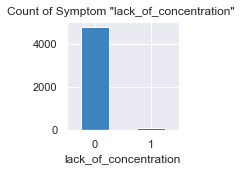

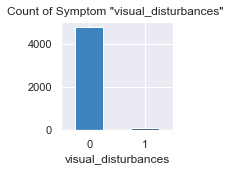

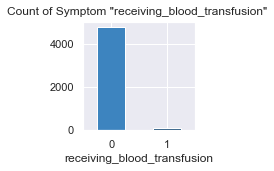

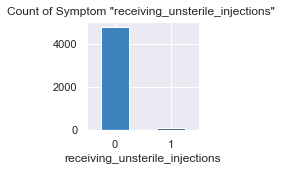

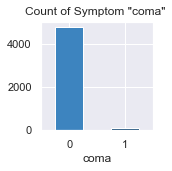

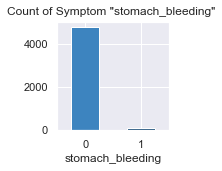

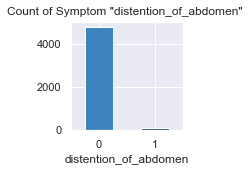

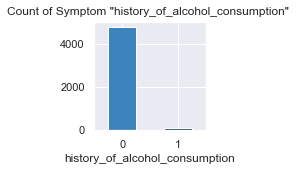

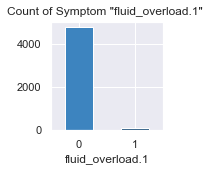

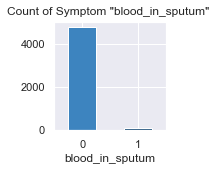

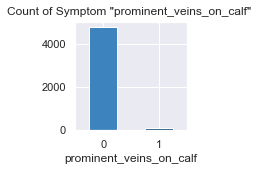

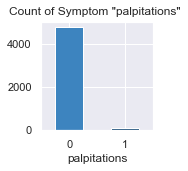

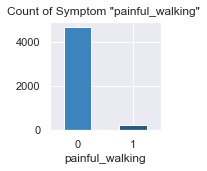

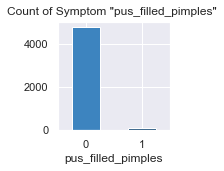

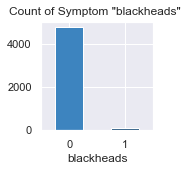

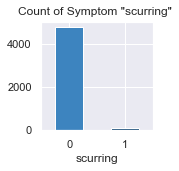

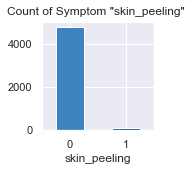

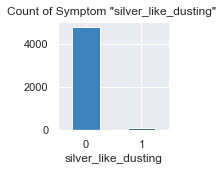

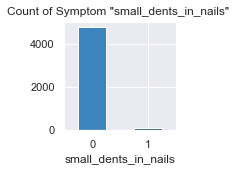

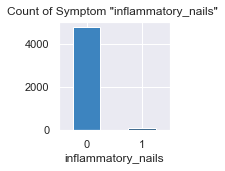

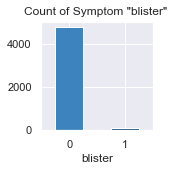

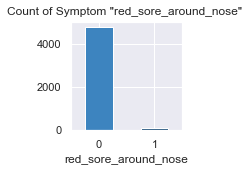

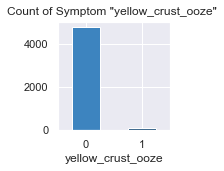

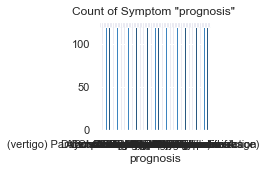

In [140]:
colors = ['#3d84bf', '#295981']
# barplot of the count for all symptoms' absence and presence
for i in columns :
    fig, ax = plt.subplots(figsize=(2,2))
    bar = dftrain.groupby(i).size().plot(kind='bar', color=colors, ax=ax)
    plt.xticks(rotation=0)
    fig.suptitle("Count of Symptom \"" + i + "\"")

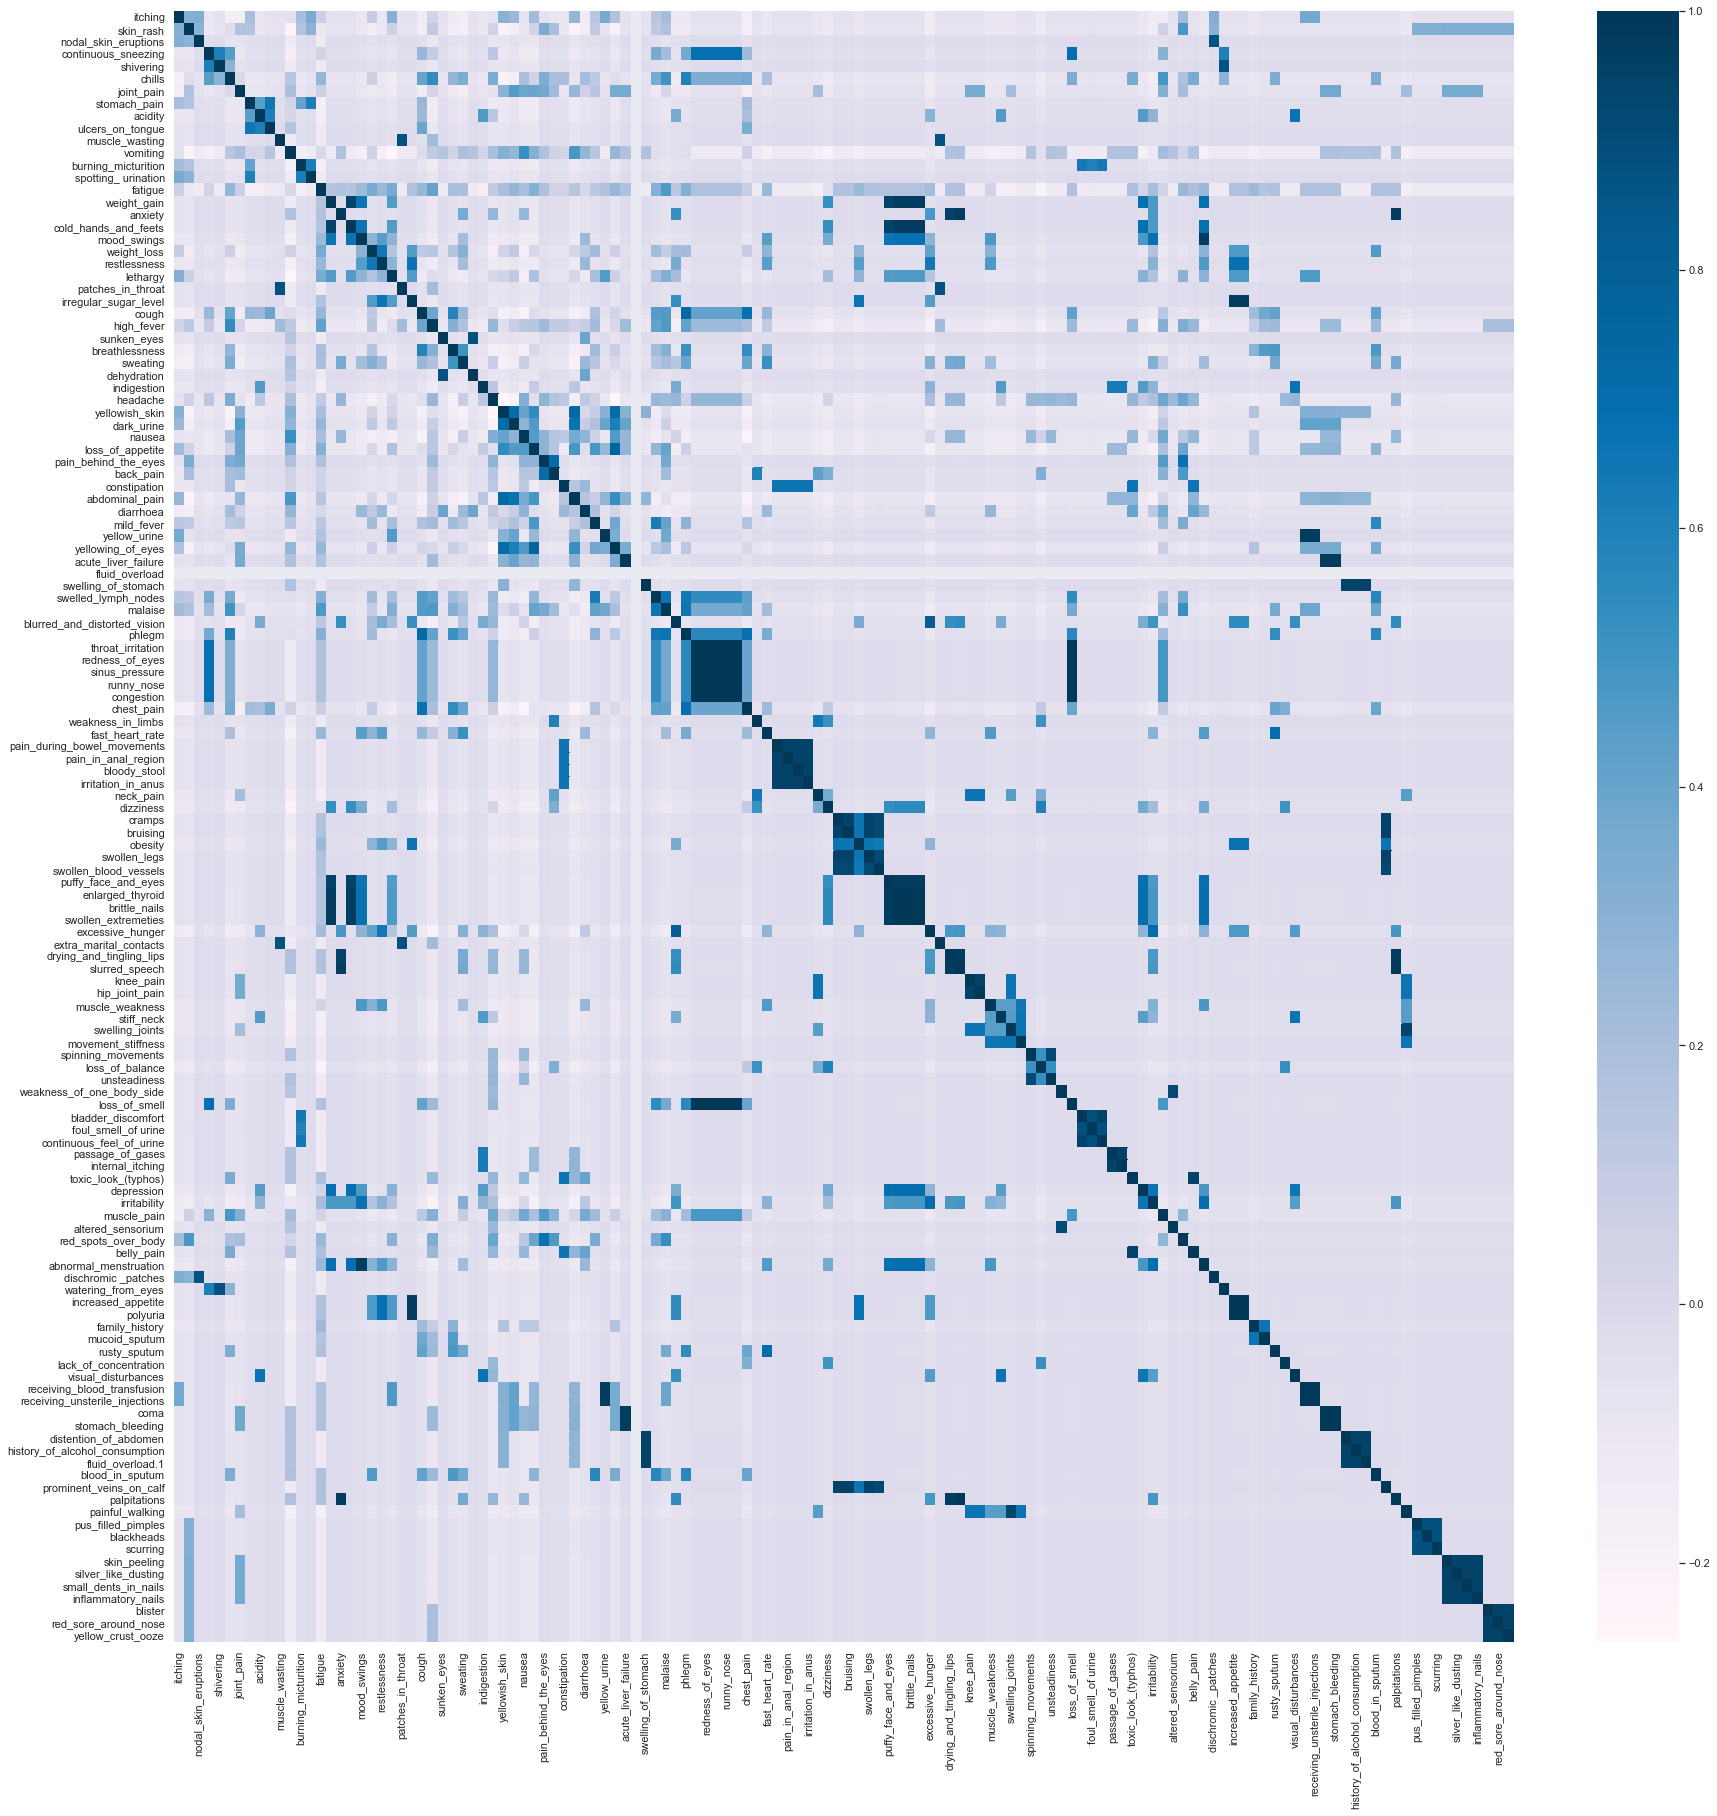

In [141]:
# compare linear relationships between attributes using correlation coefficient generated using correlation heatmap
plt.figure(figsize = (30, 30))
sns.heatmap(dftrain.corr(), cmap = 'PuBu', annot = False)
plt.show()

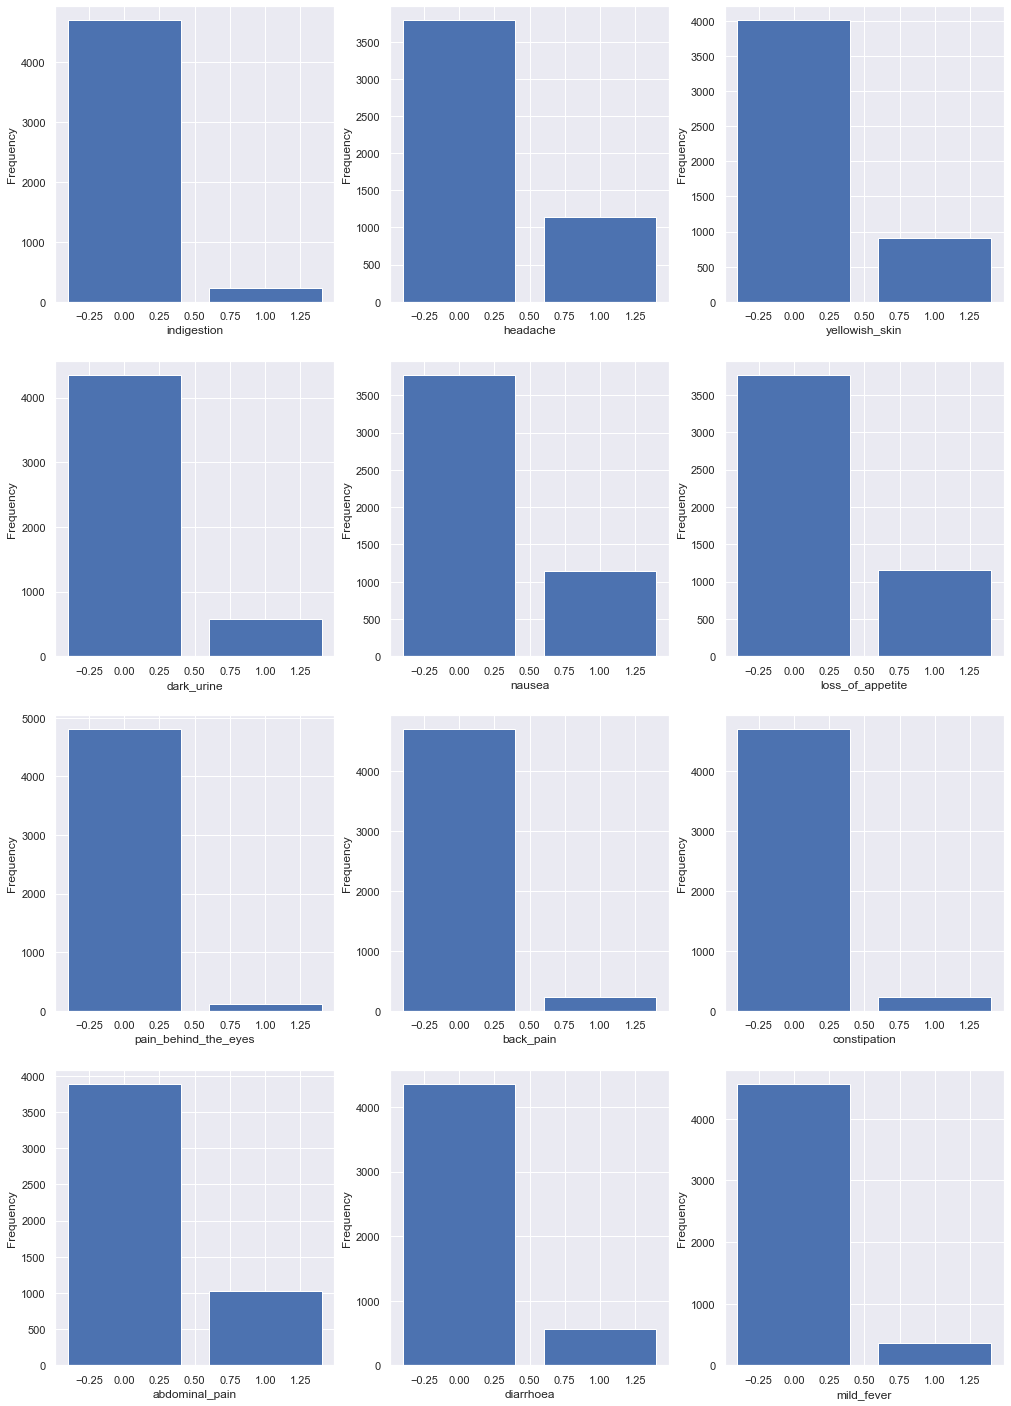

In [142]:
# lets visualize some of features
features = ['indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
       'abdominal_pain', 'diarrhoea', 'mild_fever']

plt.figure(figsize = (17,25))
for i, feature in enumerate(features):
    plt.subplot(4,3,i+1)
    plt.bar(dftrain[feature].value_counts().index.to_numpy(), dftrain[feature].value_counts().values)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.show()

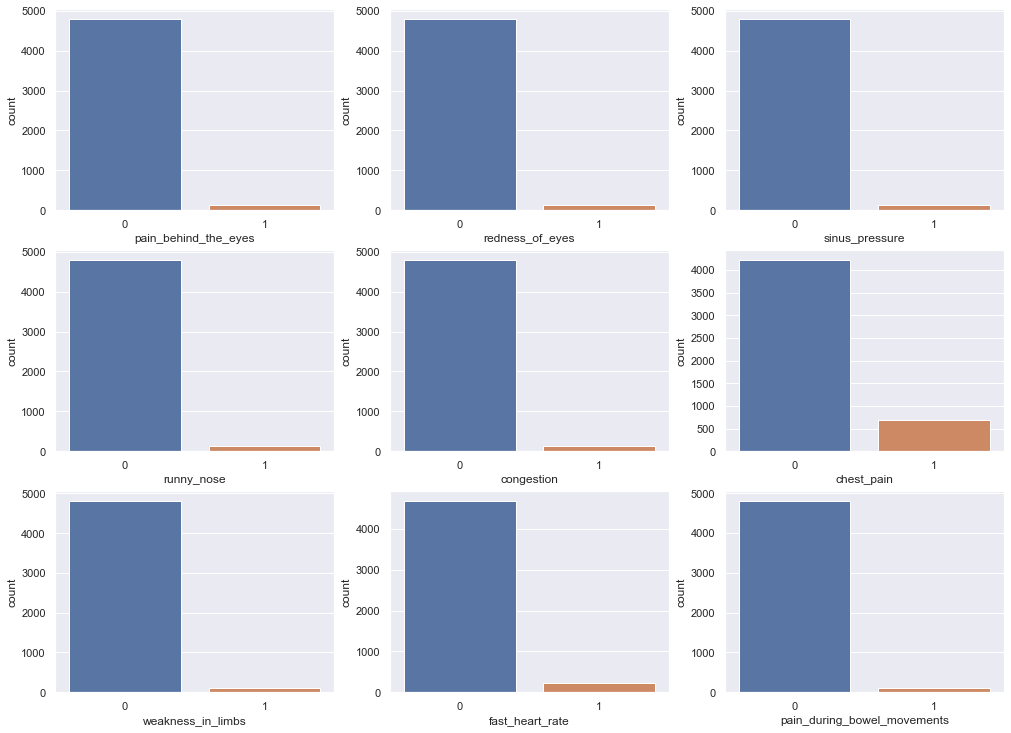

In [143]:
features = ['pain_behind_the_eyes', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion',
       'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',
       'pain_during_bowel_movements']

plt.figure(figsize = (17,17))
for i, feature in enumerate(features):
    plt.subplot(4,3,i+1)
    sns.countplot(x = feature, data = dftrain)
    plt.xlabel(feature)
plt.show()


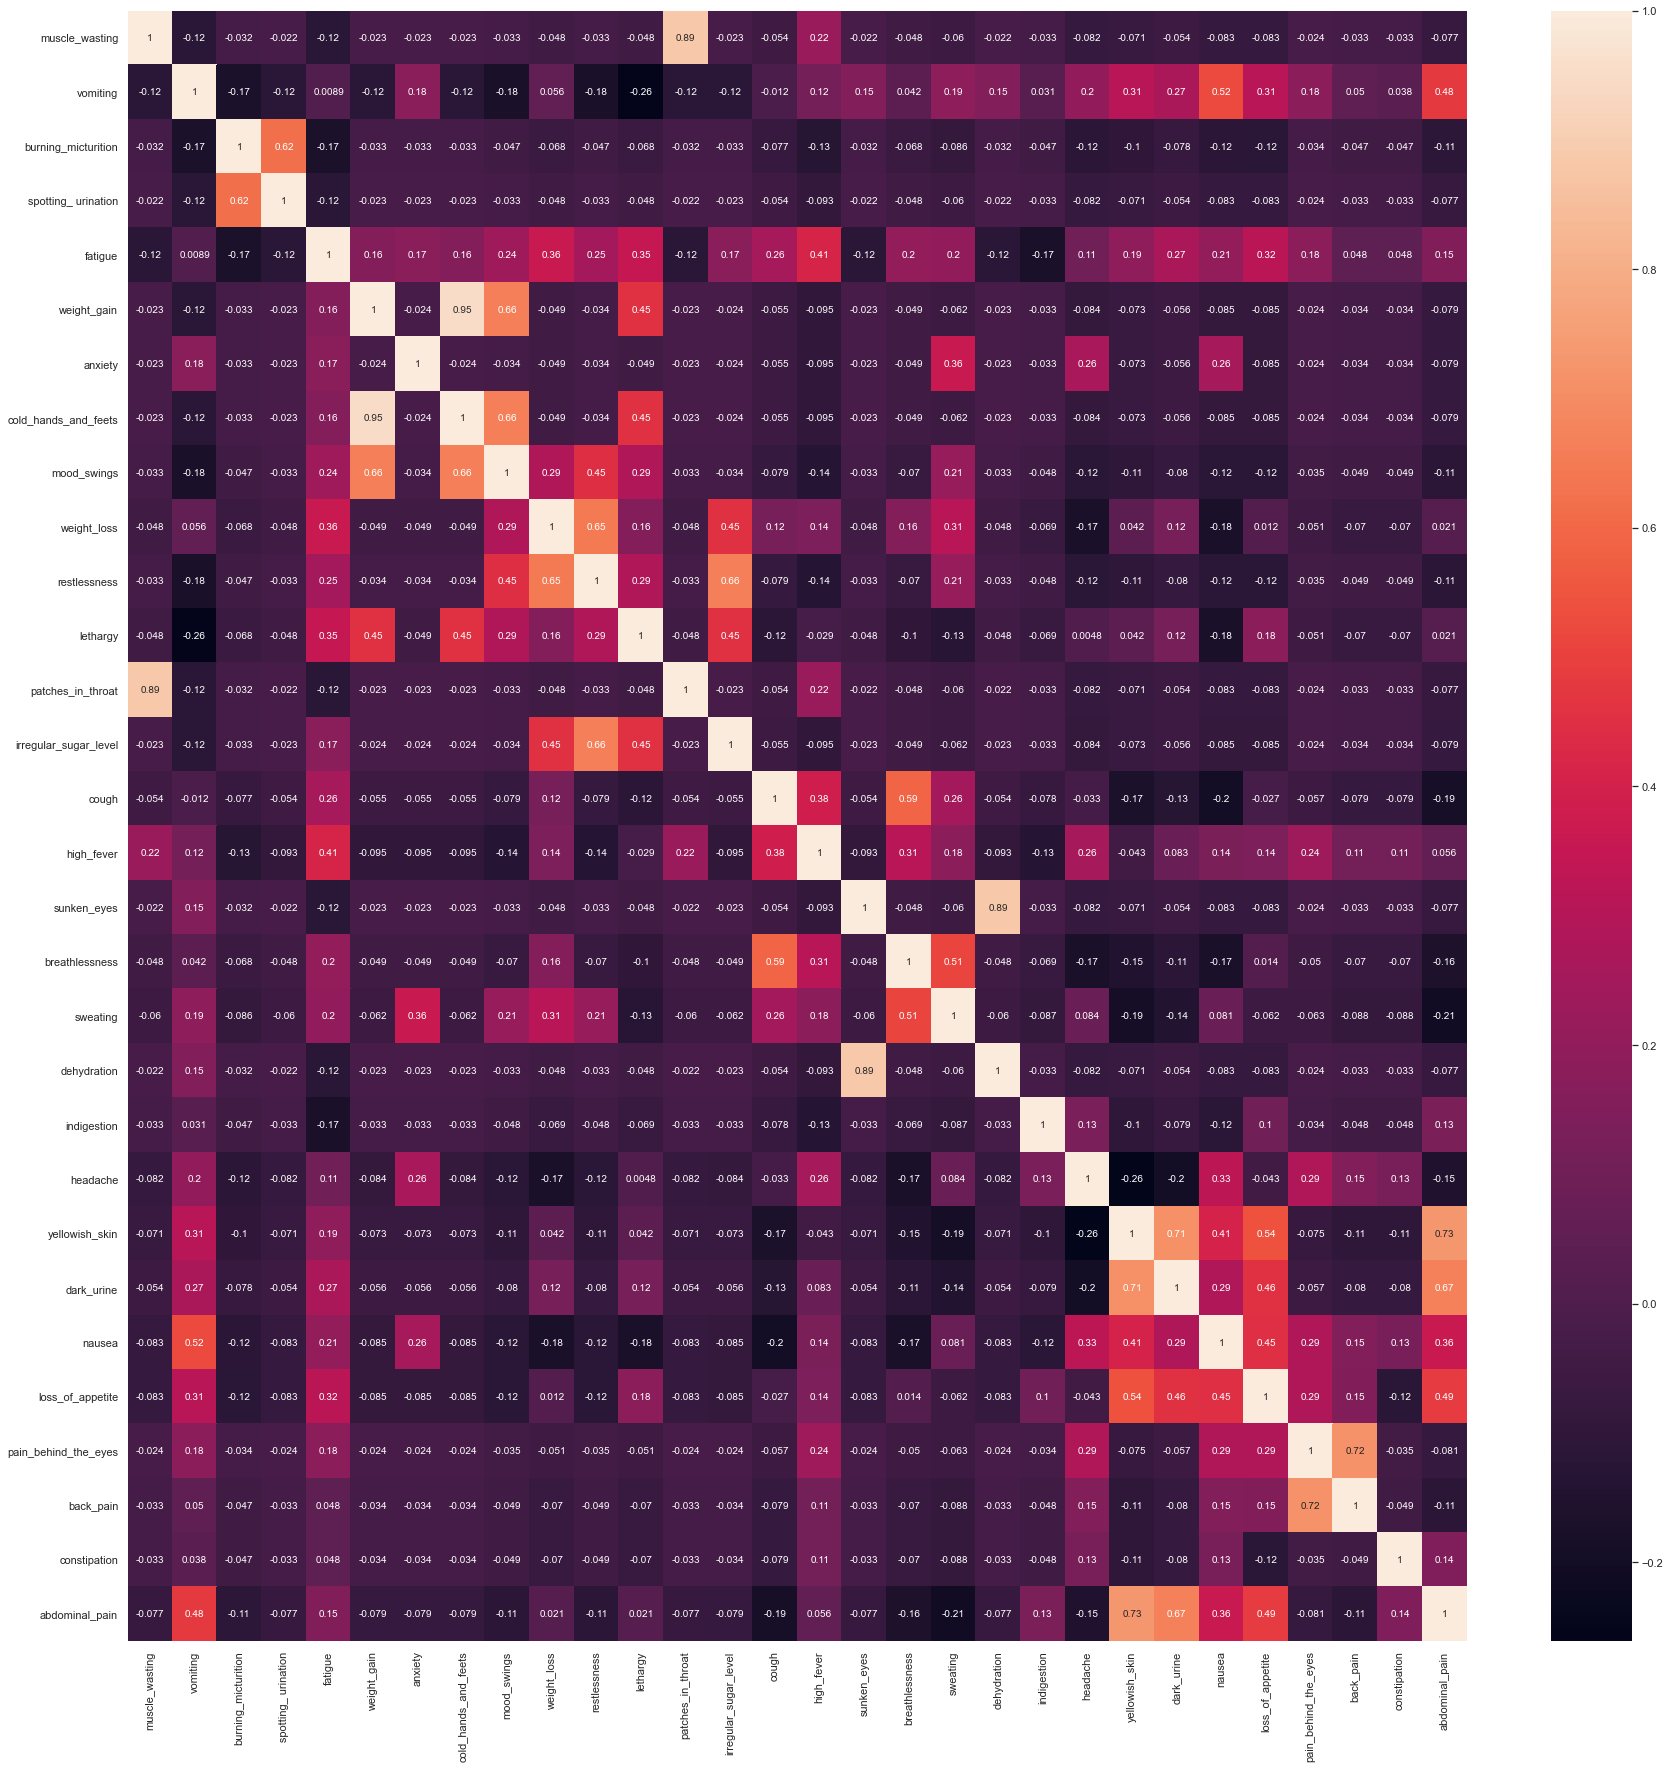

In [144]:
df_corr = dftrain.iloc[:, 10:40]
plt.figure(figsize = (30, 30))
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

As we look at from correlation map, we can infer these:

yellowish skin and abdominal pain have a high correlation coefficent which means these features usually seem together (maybe a liver problem)
cough and breathlessness also have high correlation (it's usual because lung diseases give the same symptoms)
restlessness and irregular sugar usually seem together


Lastly, the summary statistics will be considered.

In [145]:
# summary statistics of the attributes, including measures of central tendency and measures of dispersion
dftrain.describe() 

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
# summary statistics of the attributes, including measures of central tendency and measures of dispersion
dftest.describe() 

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.166667,0.190476,0.023810,0.047619,0.023810,0.166667,0.142857,0.047619,0.047619,0.023810,...,0.023810,0.023810,0.023810,0.047619,0.023810,0.023810,0.023810,0.023810,0.047619,0.023810
std,0.377195,0.397437,0.154303,0.215540,0.154303,0.377195,0.354169,0.215540,0.215540,0.154303,...,0.154303,0.154303,0.154303,0.215540,0.154303,0.154303,0.154303,0.154303,0.215540,0.154303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Modelling

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math

# split dataset into attributes and labels
X_train = dftrain.iloc[:, :-1].values # the training attributes
y_train = dftrain.iloc[:, 132].values # the training labels
X_test = dftest.iloc[:, :-1].values # the testing attributes
y_test = dftest.iloc[:, 132].values # the testing labels

In [148]:
# using DT based on information gain
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [149]:
# using RF classifier
classifierRF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

# Model Evaluation

In [150]:
# use the chosen three models to make predictions on test data
y_predDT = classifierDT.predict(X_test)
y_predRF = classifierRF.predict(X_test)

In [151]:
# for RF model
# using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_predRF))
print(classification_report(y_test, y_predRF))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierRF.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predRF))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

In [152]:
# for DT model
# using confusion matrix
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

In [153]:
# identify the important features in DT
imp = classifierDT.feature_importances_
imp

array([0.03111337, 0.05507119, 0.00235922, 0.00873855, 0.        ,
       0.01535263, 0.0152819 , 0.00382308, 0.00314548, 0.00082164,
       0.00073867, 0.09358119, 0.        , 0.00563969, 0.15787755,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00062708, 0.        , 0.        , 0.00671323,
       0.0579368 , 0.00153758, 0.00429038, 0.00124895, 0.        ,
       0.00073867, 0.03259118, 0.00942588, 0.00552119, 0.03844776,
       0.06604646, 0.        , 0.00918433, 0.0121364 , 0.02644061,
       0.01150862, 0.0017042 , 0.        , 0.03391383, 0.        ,
       0.        , 0.        , 0.        , 0.02988693, 0.        ,
       0.        , 0.00045525, 0.        , 0.        , 0.        ,
       0.0081945 , 0.04105866, 0.        , 0.        , 0.        ,
       0.00045525, 0.        , 0.        , 0.02705534, 0.        ,
       0.        , 0.        , 0.00575916, 0.        , 0.        ,
       0.        , 0.00841768, 0.        , 0.        , 0.     

In [154]:
# combine list of symptoms and their feature importance into a 2D array
columns = columns[:132]
column_names = ['symptom', 'importance']
df3 = np.vstack((columns, imp)).T
df3 = pd.DataFrame(df3, columns = column_names)
df3

,symptom,importance
0,itching,0.031113367299612726
1,skin_rash,0.05507118663125297
2,nodal_skin_eruptions,0.002359224558763329
3,continuous_sneezing,0.00873854795743233
4,shivering,0.0
...,...,...
127,small_dents_in_nails,0.0
128,inflammatory_nails,0.0
129,blister,0.0
130,red_sore_around_nose,0.0


Taking all of these into consideration, a minimum threshold for feature importance is set in order to identify features of low importance, and thus can be excluded from the final predictive model.

In [155]:
coefficients = classifierDT.feature_importances_

# set a minimum threshold for feature importance
importance_threshold = np.quantile(coefficients, q = 0.75)
import plotly.express as px

# barplot of feature importance
fig = px.bar(x = coefficients, y = columns, orientation = 'h', color = coefficients, 
             color_continuous_scale = [(0, '#b7d2e8'), (1, '#295981')], labels = {'x': "Importance Value", 'y': "Feature"}, 
             title = "Feature Importance For Decision Tree Model")

# cut off value as the minimum threshold for feature importance
fig.add_vline(x = importance_threshold, line_color = 'red', line_width = 0.8)
fig.add_vrect(x0 = importance_threshold, x1 = 0, line_width = 0, fillcolor = 'red', opacity = 0.2)
fig.show()

The symptom of 'fatique' is found to have the significantly largest predictive power of 0.1579, out of all the 132 predictors.

On the other hand, the low importance features are identified below.

In [156]:
import numpy
# identify features with feature importance values below the minimum threshold
low_importance_features = numpy.array(df3.symptom[np.abs(coefficients) <= importance_threshold])
columns = list(low_importance_features)
columns

['nodal_skin_eruptions',
 'shivering',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'burning_micturition',
 'spotting_ urination',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'dark_urine',
 'pain_behind_the_eyes',
 'mild_fever',
 'yellow_urine',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'weakness_in_limbs',
 'fast_heart_rate',
 'pain_during_bowel_movements',
 'pain_in_anal_region',
 'bloody_stool',
 'irritation_in_anus',
 'dizziness',
 'cramps',
 'bruising',
 'obesity',
 'swollen_legs',
 'swollen_blood_vessels',
 'puffy_face_and_eyes',
 'brittle_nails',
 'swollen_extremeties',
 'excessive

These low importance features are dropped.

In [157]:
for i in columns :
    # drop low importance features
    dftrain.drop(i, axis=1, inplace=True)
    dftest.drop(i, axis=1, inplace=True)
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   itching                      4920 non-null   int64 
 1   skin_rash                    4920 non-null   int64 
 2   continuous_sneezing          4920 non-null   int64 
 3   chills                       4920 non-null   int64 
 4   joint_pain                   4920 non-null   int64 
 5   vomiting                     4920 non-null   int64 
 6   fatigue                      4920 non-null   int64 
 7   high_fever                   4920 non-null   int64 
 8   headache                     4920 non-null   int64 
 9   yellowish_skin               4920 non-null   int64 
 10  nausea                       4920 non-null   int64 
 11  loss_of_appetite             4920 non-null   int64 
 12  back_pain                    4920 non-null   int64 
 13  constipation                 4920

In [158]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   itching                      42 non-null     int64 
 1   skin_rash                    42 non-null     int64 
 2   continuous_sneezing          42 non-null     int64 
 3   chills                       42 non-null     int64 
 4   joint_pain                   42 non-null     int64 
 5   vomiting                     42 non-null     int64 
 6   fatigue                      42 non-null     int64 
 7   high_fever                   42 non-null     int64 
 8   headache                     42 non-null     int64 
 9   yellowish_skin               42 non-null     int64 
 10  nausea                       42 non-null     int64 
 11  loss_of_appetite             42 non-null     int64 
 12  back_pain                    42 non-null     int64 
 13  constipation                 42 non-n

The final datasets contains 33 columns of predictors, out of the original 132. These are fed into the DT model with the parameter of best split, the criterion of entropy, and the minimum number of 2 leaves. The performance metrics of test accuracy, precision, recall, and F1-score are measured again for this new model. 

In [159]:
# split dataset into attributes and labels
X_train = dftrain.iloc[:, :-1].values # the training attributes
y_train = dftrain.iloc[:, 33].values # the training labels
X_test = dftest.iloc[:, :-1].values # the testing attributes
y_test = dftest.iloc[:, 33].values # the testing labels

# using DT based on information gain
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [160]:
# for DT model
y_predDT = classifierDT.predict(X_test)

# using confusion matrix
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

C:\Users\HanaA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\HanaA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\HanaA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



DT model has an improved performance metrics of 92% test accuracy and recall, and 92% precision and F1-score. Thus, all the prognosis are almost perfectly classified and predicted, and the small difference of 0.8% between the train and test accuracy indicates this DT model suffers from neither overfitting nor underfitting. 

In conclusion, the DT model using the parameter of best split, the criterion of entropy, and the minimum number of 2 leaves, is chosen as the final model for the prediction of disease prognosis using 33 predictors of symptoms.

The DT model is now ready to be deployed to predict new value instances. To do so, a data frame is created to describe the characteristics of a number of disease cases based on the symptoms. These new data instances will be passed to the DT model classifier to predict its target class label of disease prognosis. 

In [163]:
# new data on 33 attributes
newdata = [[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 
            0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1]]

# compute probabilities of assigning to each of the classes of prognosis
probaDT = classifierDT.predict_proba(newdata)
probaDT.round(4) # round probabilities to four decimal places, if applicable

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [164]:
# make prediction of target class label
predDT = classifierDT.predict(newdata)
predDT

array(['Hypertension '], dtype=object)

The predicted class for the specified example is assigned as "Malaria", as its probability is the highest among that for the other classes of diseases. It is also safe to intepret this result as having 92% accuracy and recall, and 92% precision and F1-score, based on the DT model's performance metrics. 

Possible improvements can be to include other strong predictors of disease prognosis, such as other symptoms outside of the aforementioned 132. These predictors can be very relevant and thus useful to include in the model design.